**README**

This notebook includes code for the first round of visualisation trials. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from functools import reduce
pd.set_option('display.max_rows', 200)
from statsmodels.graphics.mosaicplot import mosaic

path = '/Users/laurentfintoni/Desktop/University/COURSE DOCS/YEAR 2/EPUB/PROJECT/EPDS/'

#complete DFs
rhz_artworks = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra.pkl')
rhz_artists = pd.read_pickle(path+'Rhizome_data/rhizome_artists_extra.pkl')
moma_artists = pd.read_pickle(path+'MOMA_data/pickle/MoMAArtists.pkl')
moma_artworks = pd.read_pickle(path+'MOMA_data/pickle/MoMAartworks.pkl')
moma_artworks_old =  pd.read_pickle(path+'MOMA_data/pickle/old_artworks.pkl')
moma_artworks_new =  pd.read_pickle(path+'MOMA_data/pickle/new_artworks.pkl')       
#load department DFs
moma_arch_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_cont.pkl')
moma_arch_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_mod.pkl')
moma_design_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_img_cont.pkl')
moma_design_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_img_mod.pkl')
moma_draw_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_cont.pkl')
moma_draw_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_mod.pkl')
moma_films_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/films_cont.pkl')
moma_films_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/films_mod.pkl')
moma_fluxus_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_cont.pkl')
moma_fluxus_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_mod.pkl')
moma_media_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_cont.pkl')
moma_media_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_mod.pkl')
moma_paint_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_cont.pkl')
moma_paint_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_mod.pkl')
moma_photo_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_cont.pkl')
moma_photo_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_mod.pkl')

CATEGORICAL VALUE OVER TIME WITHIN ONE DATASET 
- e.g. gender representation over time within MoMA / Rhizome

In [ ]:
#RHIZOME
#filter dataset by cat value
rhizome_male_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'M']
#count cat values based on time column
rhizome_male_artworks = rhizome_male_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
rhizome_female_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'F']
rhizome_female_artworks = rhizome_female_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
#combine the two based on date 
rhizome_gender_artworks = pd.merge(rhizome_male_artworks, rhizome_female_artworks, left_on='Date Acquired', right_on='Date Acquired')
#drop values w/ no date
rhizome_gender_artworks = rhizome_gender_artworks.loc[rhizome_gender_artworks['Date Acquired'] != '0']
#arrange by date 
rhizome_gender_artworks = rhizome_gender_artworks.sort_values(by='Date Acquired')
rhizome_gender_artworks

In [162]:
rhizome_gender_artworks

,Date Acquired,Male Artists,Female Artists
15,2000,4,4
4,2001,163,70
3,2002,165,72
6,2003,103,24
2,2004,167,76
1,2005,173,63
5,2006,146,55
0,2007,180,84
7,2008,91,31
9,2009,61,7


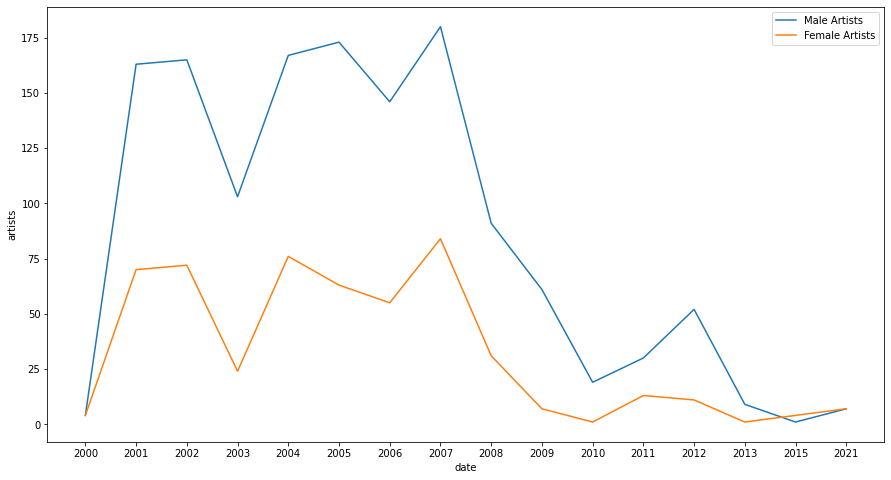

In [167]:
#dual line plot w/ cat variable over time (gender, date acquired), one database 
plots = dict(date=rhizome_gender_artworks['Date Acquired'], artists=rhizome_gender_artworks['Male Artists'], artists_2=rhizome_gender_artworks['Female Artists'])
data = pd.DataFrame(plots)
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.lineplot(x='date', y='artists', data=data, label='Male Artists')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1 = sns.lineplot(x='date', y='artists_2', data=data, label='Female Artists')

In [ ]:
#MoMA
moma_old_artworks_male = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'M']
moma_old_artworks_male.loc[:,'DateAcquired'] = moma_old_artworks_male['DateAcquired'].where((moma_old_artworks_male['DateAcquired'].str.len() <= 4), moma_old_artworks_male['DateAcquired'].str[0:4])
moma_old_artworks_male = moma_old_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_old_artworks_female = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'F']
moma_old_artworks_female.loc[:,'DateAcquired'] = moma_old_artworks_female['DateAcquired'].where((moma_old_artworks_female['DateAcquired'].str.len() <= 4), moma_old_artworks_female['DateAcquired'].str[0:4])
moma_old_artworks_female = moma_old_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_old_gender_artworks = pd.merge(moma_old_artworks_male, moma_old_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.loc[moma_old_gender_artworks['Date Acquired'] != 'nan']
moma_old_gender_artworks = moma_old_gender_artworks.sort_values(by='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.reset_index(drop=True)
moma_old_gender_artworks = moma_old_gender_artworks.drop(index=0, axis=0)
moma_old_gender_artworks

In [ ]:
moma_new_artworks_male = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'M']
moma_new_artworks_male.loc[:,'DateAcquired'] = moma_new_artworks_male['DateAcquired'].where((moma_new_artworks_male['DateAcquired'].str.len() <= 4), moma_new_artworks_male['DateAcquired'].str[0:4])
moma_new_artworks_male = moma_new_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_new_artworks_female = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'F']
moma_new_artworks_female.loc[:,'DateAcquired'] = moma_new_artworks_female['DateAcquired'].where((moma_new_artworks_female['DateAcquired'].str.len() <= 4), moma_new_artworks_female['DateAcquired'].str[0:4])
moma_new_artworks_female = moma_new_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_new_gender_artworks = pd.merge(moma_new_artworks_male, moma_new_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.loc[moma_new_gender_artworks['Date Acquired'] != 'nan']
moma_new_gender_artworks = moma_new_gender_artworks.sort_values(by='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.reset_index(drop=True)
moma_new_gender_artworks = moma_new_gender_artworks.drop(index=0, axis=0)
moma_new_gender_artworks

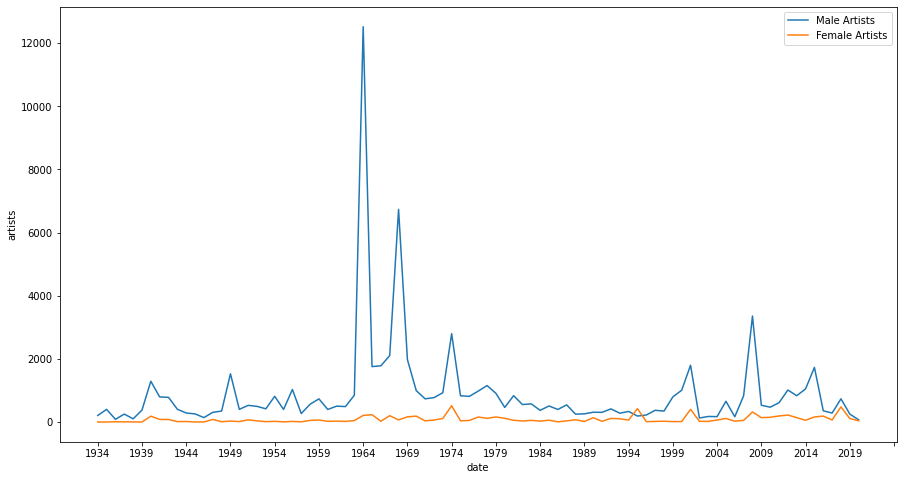

In [166]:
#dual line plot w/ cat variable over time (gender, date acquired), one database - CHANGE PLOT VALUES BTW OLD/NEW, USE [20:40] FILTER W/ NEW TO MAKE A DIRECT COMPARISON W/ RHIZOME

plots = dict(date=moma_old_gender_artworks['Date Acquired'], artists=moma_old_gender_artworks['Male Artists'], artists_2=moma_old_gender_artworks['Female Artists'])
data = pd.DataFrame(plots)
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.lineplot(x='date', y='artists', data=data, label='Male Artists')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1 = sns.lineplot(x='date', y='artists_2', data=data, label='Female Artists')

ORDINAL VALUE REPRESENTATION WITHIN ONE DATASET 
- e.g. date of acquisition within MoMA / Rhizome

In [ ]:
#create DF w/ year and counts 
moma_acquired = moma_artworks['DateAcquired'].value_counts().rename_axis('year').reset_index(name='counts')
moma_acquired = moma_acquired.sort_values(by='year', ascending=True).reset_index(drop=True)
moma_acquired['year'] = moma_acquired['year'].str[0:4]
moma_acquired = moma_acquired.loc[moma_acquired['year'] != 'nan']
moma_acquired = moma_acquired.groupby('year', axis=0).sum()
moma_acquired

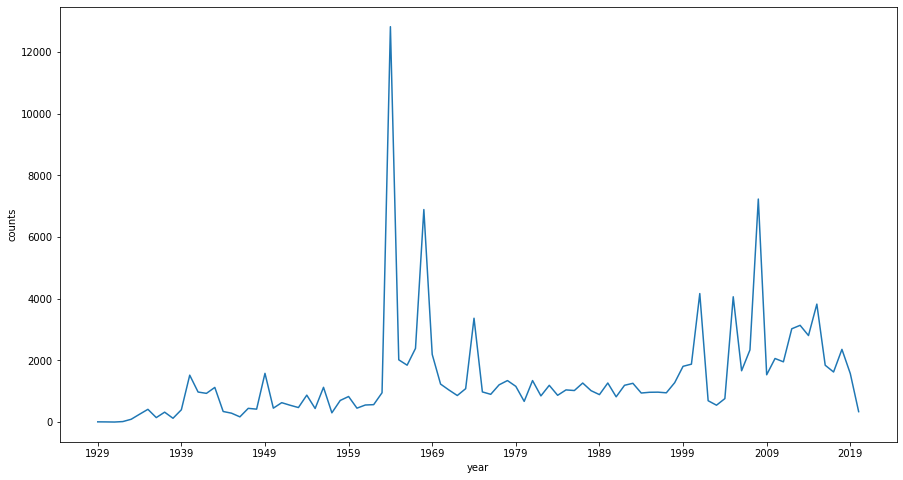

In [35]:
plt.figure(figsize=(15,8))
plot = sns.lineplot(data=moma_acquired, x="year", y="counts")
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()


COMPARE TWO NUMERICAL VALUES AGAINST EACH OTHER 
- e.g old moma v new mona  

In [4]:
#copy and add before/after value
moma_before = moma_artworks_old.copy()
moma_before['1980'] = 'before'
moma_after = moma_artworks_new.copy()
moma_after['1980'] = 'after'

#merge 
frames = [moma_before, moma_after]
moma_artworks_two_periods = pd.concat(frames)

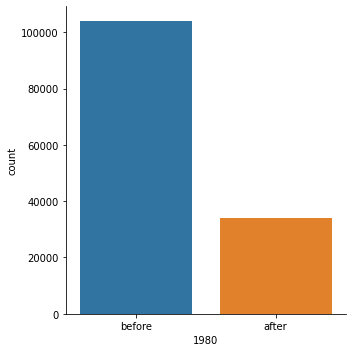

In [37]:
sns.catplot(x='1980', kind='count', data= moma_artworks_two_periods, order=['before', 'after'])

In [38]:
#count occurrences of department values before and after 1980
before_n = moma_before['Department'].value_counts().rename_axis('Department').reset_index(name='Before')
after_n = moma_after['Department'].value_counts().rename_axis('Department').reset_index(name='After')
moma_1980_x_dep = pd.merge(before_n, after_n, left_on='Department', right_on='Department')
moma_1980_x_dep

,Department,Before,After
0,Drawings & Prints,54384,21733
1,Photography,26705,5193
2,Architecture & Design,15983,3747
3,Painting & Sculpture,2989,920
4,Fluxus Collection,1916,103
5,Film,1041,454
6,Media and Performance,949,2004


Text(0.5, 1.0, 'how the composition of the collectionchanges before and after 1980')

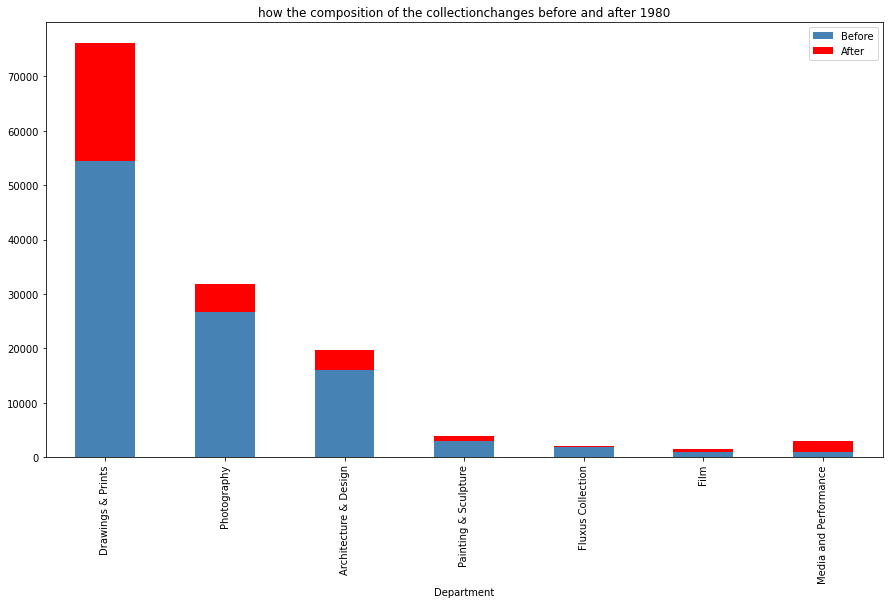

In [49]:
#set the index
moma_1980_x_dep.set_index('Department').plot(kind='bar', stacked=True, color=['steelblue', 'red'], figsize=(15,8))
# title and size of plot
plt.title('how the composition of the collectionchanges before and after 1980')


In [5]:
#MOMA: how the composition of the collection (by gender) changes before and after 1980 (old vs new)
old_gender = moma_before['Gender'].value_counts().rename_axis('Gender').reset_index(name='Old')
new_gender = moma_after['Gender'].value_counts().rename_axis('Gender').reset_index(name='New')
moma_gender_count = pd.merge(old_gender, new_gender, left_on='Gender', right_on='Gender')
moma_gender_count = moma_gender_count.set_index('Gender')
#choose only M, F, missing 
moma_gender_count = moma_gender_count[0:3]
#transpose columns and index to have triple stack 
moma_gender_count = moma_gender_count.transpose()
moma_gender_count

Gender,M,F,missing
Old,82418,9030,7689
New,21750,8793,952


Text(0.5, 1.0, 'how the gender composition of the collection changes before and after 1980')

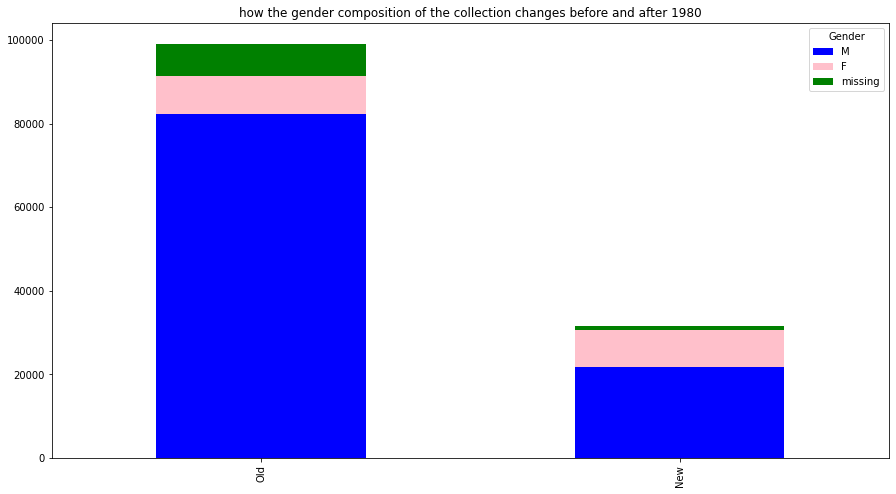

In [123]:
#set the index
moma_gender_count.plot(kind='bar', stacked=True, color=['blue', 'pink', 'green'], figsize=(15,8))
# title and size of plot
plt.title('how the gender composition of the collection changes before and after 1980')


In [6]:
#MOMA: how the composition of the collection (by gender) changes before and after 1980 (old vs new) - COLLECTIVES
moma_gender_multiple = pd.merge(old_gender, new_gender, left_on='Gender', right_on='Gender')
moma_gender_multiple = moma_gender_multiple.set_index('Gender')
#choose only collectives
moma_gender_multiple = moma_gender_multiple[4:].reset_index()
#remove collectives w/ no gender
drops = ['missing, missing', 'missing, missing, missing', 'missing, missing, missing, missing, missing', 'missing, missing, missing, missing']
#filter by only males, only females, or mixed gender (mixed gender also includes collectives w/ at least one M or F and some missing)
moma_gender_multiple = moma_gender_multiple[moma_gender_multiple.Gender.isin(drops) == False]
moma_gender_multiple_male = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('F') == False) & (moma_gender_multiple['Gender'].str.contains('missing') == False)]
moma_gender_multiple_female = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('M') == False) & (moma_gender_multiple['Gender'].str.contains('missing') == False)]
moma_gender_multiple_both = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('F')== True) & (moma_gender_multiple['Gender'].str.contains('M')== True) & (moma_gender_multiple['Gender'].str.contains('missing')== False)]
moma_gender_multiple_male_missing = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('M') == True) & (moma_gender_multiple['Gender'].str.contains('missing') == True) & (moma_gender_multiple['Gender'].str.contains('F') == False)]
moma_gender_multiple_female_missing = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('M') == False) & (moma_gender_multiple['Gender'].str.contains('missing') == True) & (moma_gender_multiple['Gender'].str.contains('F') == True)]

In [7]:
#send filters to series 
moma_gender_multiple_both_counts = moma_gender_multiple_both.sum()
moma_gender_multiple_male_counts = moma_gender_multiple_male.sum()
moma_gender_multiple_female_counts = moma_gender_multiple_female.sum()
moma_gender_multiple_male_missing_counts = moma_gender_multiple_male_missing.sum()
moma_gender_multiple_female_missing_counts = moma_gender_multiple_female_missing.sum()
#create new DF w/ results 
moma_gender_counts_final = pd.DataFrame()
moma_gender_counts_final['Male Only'] = moma_gender_multiple_male_counts
moma_gender_counts_final['Male & Missing'] = moma_gender_multiple_male_missing_counts
moma_gender_counts_final['Female Only'] = moma_gender_multiple_female_counts
moma_gender_counts_final['Female & Missing'] = moma_gender_multiple_female_missing_counts
moma_gender_counts_final['Mixed Gender'] = moma_gender_multiple_both_counts
moma_gender_counts_final = moma_gender_counts_final.drop('Gender', axis=0)

In [13]:
moma_gender_counts_final

,Male Only,Male & Missing,Female Only,Female & Missing,Mixed Gender
Old,825,1109,29,22,893
New,107,698,144,47,671


In [15]:
import plotly.graph_objects as go

x=['old', 'new']
fig = go.Figure(go.Bar(x=x, y=[825, 107], name='Male Only'))
fig.add_trace(go.Bar(x=x, y=[1109, 698], name='Male & Missing'))
fig.add_trace(go.Bar(x=x, y=[29, 144], name='Female Only'))
fig.add_trace(go.Bar(x=x, y=[22, 47], name='Female & Missing'))
fig.add_trace(go.Bar(x=x, y=[893, 671], name='Mixed Gender'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

Text(0.5, 1.0, 'how the composition of the collection changes before and after 1980 for collectives')

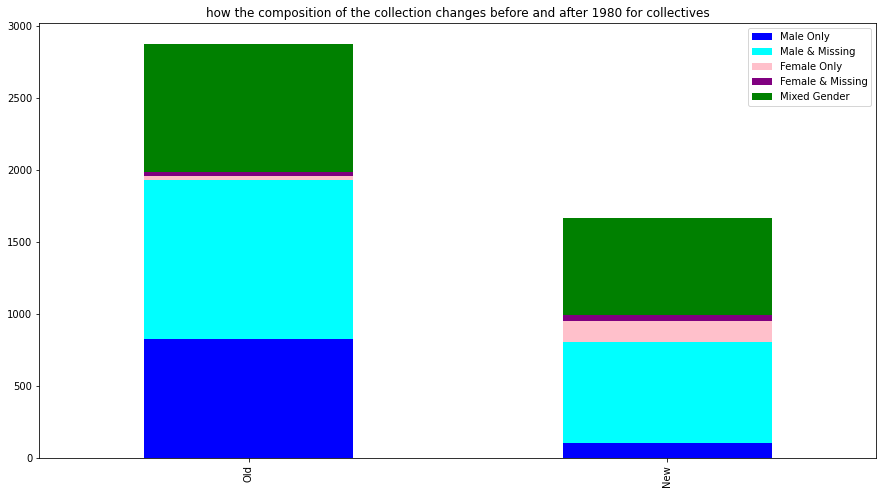

In [161]:
#set the index
moma_gender_counts_final.plot(kind='bar', stacked=True, color=['blue', 'cyan', 'pink', 'purple', 'green'], figsize=(15,8))
# title and size of plot
plt.title('how the composition of the collection changes before and after 1980 for collectives')

CATEGORICAL VALUE OVER TIME ACROSS TWO DATASETS

Text(0, 0.5, 'Rhizome')

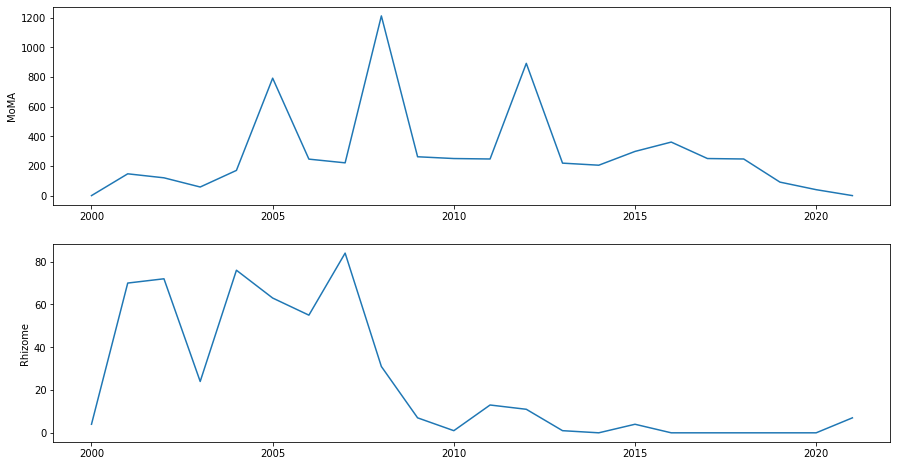

In [165]:
#FEMALE ARTISTS ACQUISITION comparison across datasets, over time (date acquired)

#reuse existing filters and drops the Males
moma_new_gender_artworks_2 = moma_new_gender_artworks.drop('Male Artists', axis=1)
moma_new_gender_artworks_2 = moma_new_gender_artworks_2[20:40]
rhizome_gender_artworks_2 = rhizome_gender_artworks.drop('Male Artists', axis=1)
female_acquired = pd.merge(moma_new_gender_artworks_2, rhizome_gender_artworks_2, on='Date Acquired', how='outer')
female_acquired = female_acquired.fillna('0')
female_acquired = female_acquired.astype(int)
female_acquired = female_acquired.sort_values(by='Date Acquired')

x = female_acquired['Date Acquired']
y1 = female_acquired['Female Artists_x']
y2 = female_acquired['Female Artists_y']
f, axes = plt.subplots(2, 1, figsize=(15,8))
axes[0].plot(x, y1)
axes[0].set_ylabel('MoMA')

axes[1].plot(x, y2)
axes[1].set_ylabel('Rhizome')

COMPARISON OF CAT VALUE BTW TWO DATASETS

In [185]:
moma_genders = moma_artists.copy()
moma_genders = moma_genders.sample(n=1301)
moma_genders = moma_genders.reset_index(drop=True)
moma_genders = moma_genders[['Gender']]
moma_genders['Source'] = 'MoMA'
rhizome_genders = rhz_artists.copy()
rhizome_genders = rhizome_genders[['Gender']]
rhizome_genders['Source'] = 'Rhizome'
frames = [moma_genders, rhizome_genders]
combined = pd.concat(frames, axis=0)
combined = combined.reset_index(drop=True)
combined

In [188]:
combined

,Gender,Source
0,M,MoMA
1,M,MoMA
2,F,MoMA
3,M,MoMA
4,missing,MoMA
...,...,...
2595,M,Rhizome
2596,missing,Rhizome
2597,F,Rhizome
2598,M,Rhizome


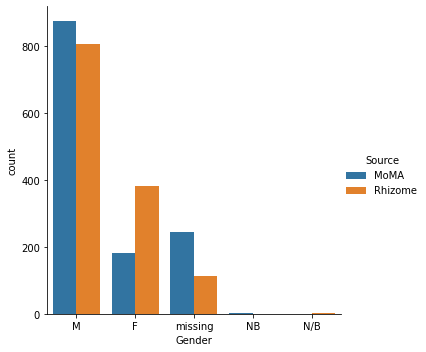

In [187]:
sns.catplot(x='Gender', kind='count', hue='Source', data=combined)

COMPARISON OF TWO CAT VALUES OVER MULTIPLE CAT VALUES 

In [190]:
moma_photo = moma_artworks_new[moma_artworks_new['Department'] == 'Photography']
moma_medium_male = moma_photo.loc[moma_photo['Gender'] == 'M']
moma_medium_male = moma_medium_male['Medium'].value_counts().rename_axis('Medium').reset_index(name='Male Artists')
moma_medium_female = moma_photo.loc[moma_photo['Gender'] == 'F']
moma_medium_female = moma_medium_female['Medium'].value_counts().rename_axis('Medium').reset_index(name='Female Artists')
moma_medium_pyramid = pd.merge(moma_medium_male, moma_medium_female, on='Medium', how='outer')
moma_medium_pyramid = moma_medium_pyramid.fillna('0')
moma_medium_pyramid['Male Artists'] = moma_medium_pyramid['Male Artists'].astype(int)
moma_medium_pyramid['Female Artists'] = moma_medium_pyramid['Female Artists'].astype(int)
moma_medium_pyramid = moma_medium_pyramid.reset_index(drop=True)
moma_medium_pyramid = moma_medium_pyramid.set_index('Medium')
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Page with chromogenic color print and text,125,0
Silver dye bleach print,66,39
...,...,...
Chromogenic color print (Digital exposure to Fujiflex paper),0,1
Four pigmented inkjet prints,0,1
"Silver dye bleach print, printed 2009",0,1


In [191]:
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Male Artists'] > 1]
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Female Artists'] > 1]
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Silver dye bleach print,66,39
Pigmented inkjet prints,49,6
Color instant print (Polaroid),27,4
"Gelatin silver print, printed 1996",17,3
Gelatin silver prints,16,8
"Gelatin silver print, printed 2016",10,3


In [192]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = moma_medium_pyramid.index
column0 = moma_medium_pyramid['Male Artists']
column1 = moma_medium_pyramid['Female Artists']
title0 = 'Male Artists'
title1 = 'Female Artists'

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


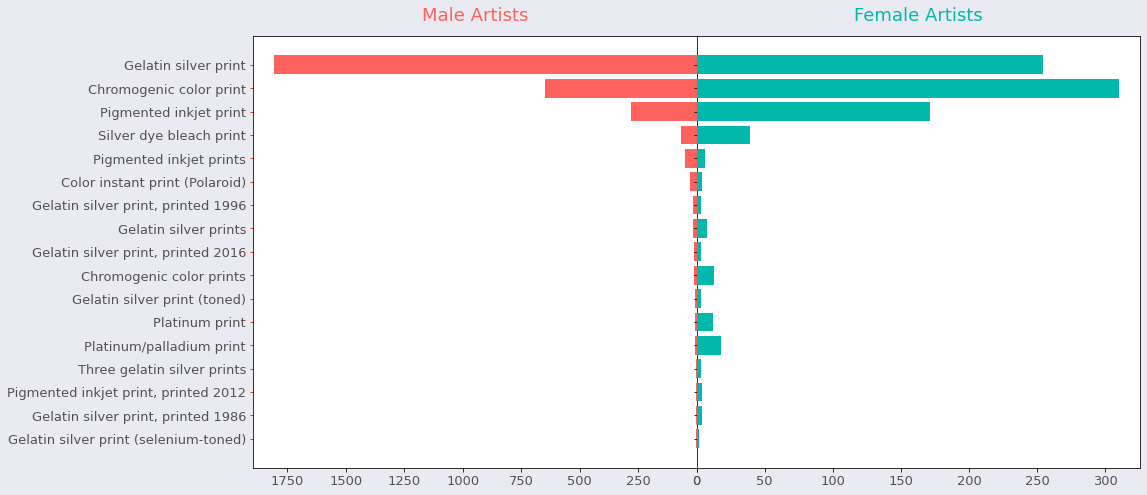

In [193]:
fig, axes = plt.subplots(figsize=(16,8), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=30)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=30)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
# To show data from highest to lowest
plt.gca().invert_yaxis()
axes[0].set(yticks=moma_medium_pyramid.index, yticklabels=moma_medium_pyramid.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='red') # tick color
#axes[1].set_xticks([0, 100, 200, 300, 400])
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)